In [ ]:
pip install opencv-python matplotlib numpy scikit-learn keras ultralytics tensorflow tensorflow-datasets

# face recognition (image) 

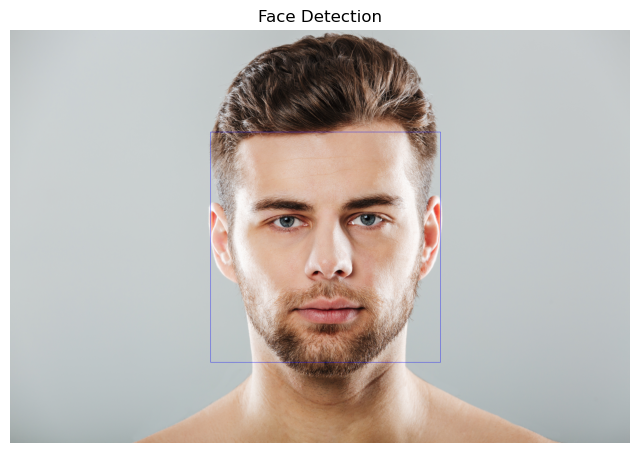

In [5]:
import cv2
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

image_path = "C:/user/close-up-portrait-young-bearded-man-face.jpg"  # Update with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found!")
else:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Face Detection")
    plt.show()


#  face recognition web cam

In [9]:
import cv2

face_cap = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

# Open webcam
video_cap = cv2.VideoCapture(0)

while True:
    ret, video_data = video_cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(video_data, cv2.COLOR_BGR2GRAY)

    faces = face_cap.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(video_data, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow("Live Face Detection", video_data)

    # Press 'a' to exit
    if cv2.waitKey(10) & 0xFF == ord('a'):
        break
        
video_cap.release()
cv2.destroyAllWindows()


# Content Based Image Retrieval (CBIR)

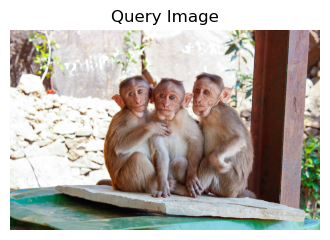

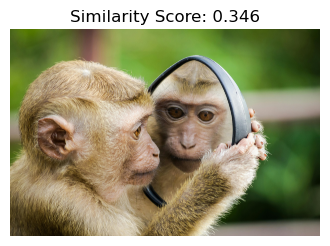

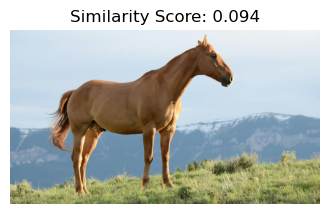

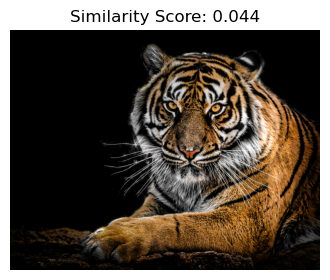

In [5]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os

def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
                        [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

query_path = "C:/Users/query.jpg" #update with image path

if not os.path.exists(query_path):
    raise FileNotFoundError(f"Query image not found: {query_path}")

query_image = cv2.imread(query_path)
query_features = extract_color_histogram(query_image)

image_paths = ["C:/Users/horse.jpg",  #update with image path
               "C:/Users/tiger.jpg",  #update with image path
               "C:/Users/monkey.jpg"] #update with image path
dataset = []

for path in image_paths:
    if not os.path.exists(path):
        raise FileNotFoundError(f"Dataset image not found: {path}")
    dataset.append(cv2.imread(path))

dataset_features = [extract_color_histogram(img) for img in dataset]

similarities = [
    cosine_similarity([query_features], [features])[0][0]
    for features in dataset_features
]

ranked_indices = sorted(
    range(len(similarities)),
    key=lambda i: similarities[i],
    reverse=True
)

plt.figure(figsize=(4, 4))
plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
plt.title("Query Image")
plt.axis("off")
plt.show()

for i in ranked_indices:
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(dataset[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Similarity Score: {similarities[i]:.3f}")
    plt.axis("off")
    plt.show()


# Pattern Recognition (auto scaling, auto correlation , feature weighting)

In [21]:
import numpy as np

# Sample dataset
data = np.array([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0],
    [10.0, 11.0, 12.0]
])

def auto_scale(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    return (data - mean) / std_dev

def auto_correlation(data):
    return np.corrcoef(data, rowvar=False)

def feature_weighting(data):
    variance = np.var(data, axis=0)
    return data * variance

scaled_data = auto_scale(data)
print("Standardized Data:")
print(scaled_data)

correlation_matrix = auto_correlation(scaled_data)
print("\nAuto-correlation Matrix:")
print(correlation_matrix)

weighted_data = feature_weighting(scaled_data)
print("\nWeighted Data:")
print(weighted_data)


Standardized Data:
[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]

Auto-correlation Matrix:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Weighted Data:
[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]


# Pattern Recognition (Cluster Analysis, Principal Component Analysis, Artificial Neural Networks)

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target

def perform_kmeans(X, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    return kmeans.labels_

def perform_pca(X, n_components=2):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca

def build_and_train_ann(X, y, epochs=50, batch_size=5):
    y_categorical = to_categorical(y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_categorical, test_size=0.2, random_state=42
    )

    model = Sequential()
    model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(3, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'ANN Classification Accuracy: {accuracy * 100:.2f}%')

    predictions = model.predict(X_test)
    return model, predictions

cluster_labels = perform_kmeans(X)
print("Cluster Labels:")
print(cluster_labels)

X_pca = perform_pca(X)
print("\nPCA Transformed Data:")
print(X_pca)

ann_model, ann_predictions = build_and_train_ann(X_pca, y)
print("\nANN Predictions:")
print(np.argmax(ann_predictions, axis=1))


# Object Detection & Recognition using YOLOv8 (Image)

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO("yolov8n.pt")
print("YOLOv8 model loaded successfully!")

image_path = "C:/Users/bicycle.jpg"  # replace with your image path
results = model(image_path)  

output_image = cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis("off")
plt.show()

model.predict(source=image_path, save=True)
print("Output saved inside 'runs/detect/predict' folder.")


YOLOv8 model loaded successfully!



# Handwritten Digit Recognition

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}, Accuracy: {logs.get('accuracy')}")
        if logs.get('accuracy') >= 0.981:
            print("\nReached 98.1% accuracy so stopping training!")
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit(X_train, Y_train, epochs=5,
                    validation_data=(X_test, Y_test),
                    callbacks=[callbacks])

def prepImg(data):
    return cv2.resize(data, (28,28)).reshape(28,28,1)/255.0

img = cv2.imread("images.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
_, im_th = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY_INV)

ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for x, y, w, h in rects:
    y = max(0, y-3)
    x = max(0, x-3)
    w += 6
    h += 6
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    sliced = im_th[y:y+h, x:x+w]
    sliced = img_to_array(sliced, dtype='float32')
    sliced = prepImg(sliced)
    sliced = np.expand_dims(sliced, axis=0)

    prediction = model.predict(sliced)
    predicted_class_index = np.argmax(prediction)
    cv2.putText(img, str(predicted_class_index), (x+w, y+int(h/2)),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


# Handwritten Alphabet Recognition

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import emnist  

import tensorflow_datasets as tfds

ds_train, ds_test = tfds.load('emnist/letters', split=['train', 'test'], as_supervised=True)

def tfds_to_numpy(ds):
    X, y = [], []
    for img, label in tfds.as_numpy(ds):
        X.append(img)
        y.append(label)
    return np.array(X), np.array(y)

X_train, Y_train = tfds_to_numpy(ds_train)
X_test, Y_test = tfds_to_numpy(ds_test)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

Y_train -= 1
Y_test -= 1

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Y_train = to_categorical(Y_train, num_classes=26)
Y_test = to_categorical(Y_test, num_classes=26)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')  
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}, Accuracy: {logs.get('accuracy')}")
        if logs.get('accuracy') >= 0.981:
            print("\nReached 98.1% accuracy so stopping training!")
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit(X_train, Y_train, epochs=5,
                    validation_data=(X_test, Y_test),
                    callbacks=[callbacks])

def prepImg(data):
    return cv2.resize(data, (28,28)).reshape(28,28,1)/255.0

img = cv2.imread("handwritten_letters.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
_, im_th = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY_INV)

ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for x, y, w, h in rects:
    y = max(0, y-3)
    x = max(0, x-3)
    w += 6
    h += 6
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    sliced = im_th[y:y+h, x:x+w]
    sliced = img_to_array(sliced, dtype='float32')
    sliced = prepImg(sliced)
    sliced = np.expand_dims(sliced, axis=0)

    prediction = model.predict(sliced)
    predicted_class_index = np.argmax(prediction)
    predicted_letter = chr(predicted_class_index + 65)  
    cv2.putText(img, predicted_letter, (x+w, y+int(h/2)),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()
